Made by - <br>Abhilash Chaudhary (M23AID027) <br>
              Bhavna Gupta (M23AID003) <br>
              Snehal Awelkar (M23AID045)<br>
              Subham Roy  (M23AID027)
         
SEM 2 Data Analysis lab Project  <br>
IIT Jodhpur

In [5]:
library(tidyverse)
list.files(path = "../input")
install.packages('quantmod')
library(quantmod)

character(0)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [6]:
df <- read.csv("all_stocks_5yr.csv")

In [8]:
df_amzn <- df %>% filter(Name == "AMZN")
df_amzn$date <- as.Date(df_amzn$date)

clean up missing value

In [11]:
df_amzn_summary <- df_amzn[, 1:6]

df_amznF <- as.xts(df_amzn_summary)
names(df_amznF)

[1] "open"   "high"   "low"    "close"  "volume"

In [15]:
names(df_amznF) <- c("df_amznF.Open"   ,  "df_amznF.High"   ,  "df_amznF.Low"   ,   "df_amznF.Close"  ,  "df_amznF.Volume")
names(df_amznF)

[1] "df_amznF.Open"   "df_amznF.High"   "df_amznF.Low"    "df_amznF.Close" 
[5] "df_amznF.Volume"

In [ ]:
summary(`df_amzn`)

      date                 open             high             low        
 Min.   :2013-02-08   Min.   : 248.9   Min.   : 252.9   Min.   : 245.8  
 1st Qu.:2014-05-10   1st Qu.: 325.9   1st Qu.: 329.5   1st Qu.: 322.2  
 Median :2015-08-10   Median : 506.0   Median : 512.3   Median : 495.6  
 Mean   :2015-08-09   Mean   : 576.9   Mean   : 582.0   Mean   : 571.1  
 3rd Qu.:2016-11-05   3rd Qu.: 777.6   3rd Qu.: 781.8   3rd Qu.: 770.7  
 Max.   :2018-02-07   Max.   :1477.4   Max.   :1498.0   Max.   :1450.0  
     close            volume             Name          
 Min.   : 248.2   Min.   : 1092970   Length:1259       
 1st Qu.: 325.8   1st Qu.: 2511165   Class :character  
 Median : 503.8   Median : 3144719   Mode  :character  
 Mean   : 576.9   Mean   : 3730465                     
 3rd Qu.: 777.4   3rd Qu.: 4220246                     
 Max.   :1450.9   Max.   :23856060                     

In [ ]:
summary(`df_amzn`)
df_amzn_summary <- df_amzn[, 2:6]

for (colname in colnames(df_amzn_summary)) {
  cat("Statistical Distribution of", colname, "\n")

  if (is.numeric(df_amzn_summary[[colname]])) {
    cat(
        "| SD : ", sd(df_amzn_summary[[colname]]),
        "| Var :", var(df_amzn_summary[[colname]]),
        "| IQR(Q3 - Q1) :", IQR(df_amzn_summary[[colname]]),
        "\n\n")
  } else {
    cat("Column is not numeric.\n")
  }
}

Statistical Distribution of open 
| SD :  282.5 | Var : 79806.26 | IQR(Q3 - Q1) : 451.75 

Statistical Distribution of high 
| SD :  284.4171 | Var : 80893.1 | IQR(Q3 - Q1) : 452.36 

Statistical Distribution of low 
| SD :  280.2152 | Var : 78520.58 | IQR(Q3 - Q1) : 448.535 

Statistical Distribution of close 
| SD :  282.5004 | Var : 79806.47 | IQR(Q3 - Q1) : 451.62 

Statistical Distribution of volume 
| SD :  2166506 | Var : 4.693747e+12 | IQR(Q3 - Q1) : 1709082 



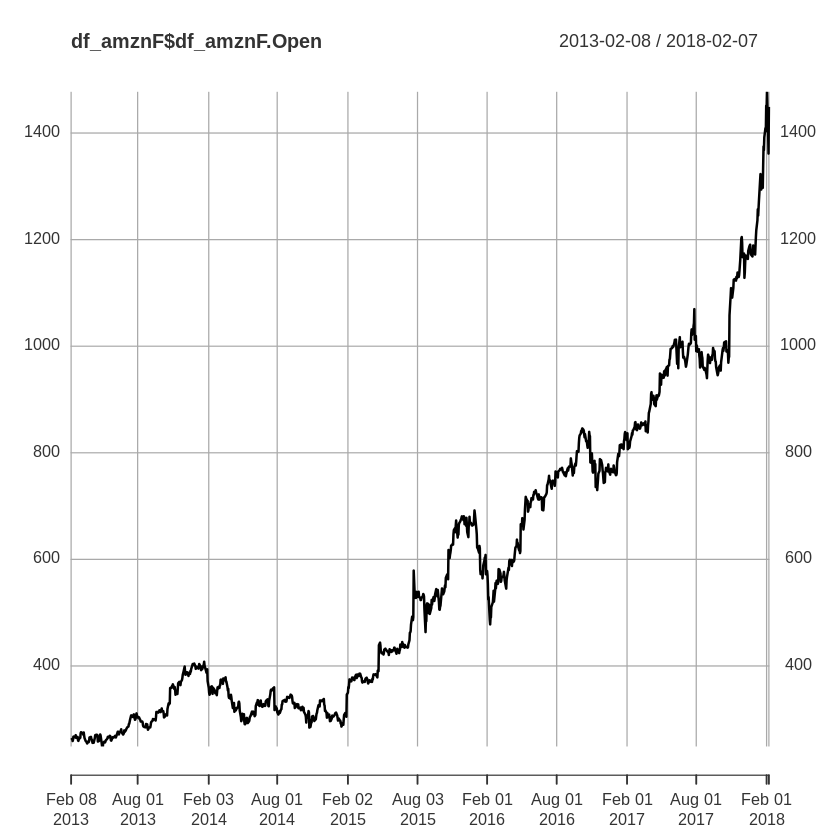

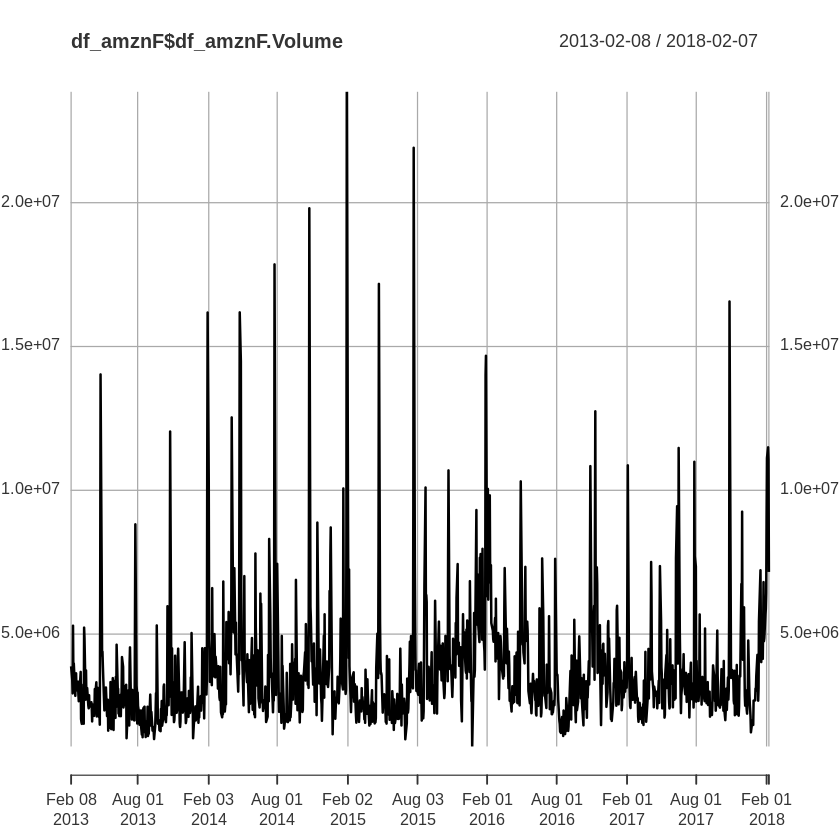

In [ ]:
plot.xts(df_amznF$df_amznF.Open)
plot(df_amznF$df_amznF.Volume)

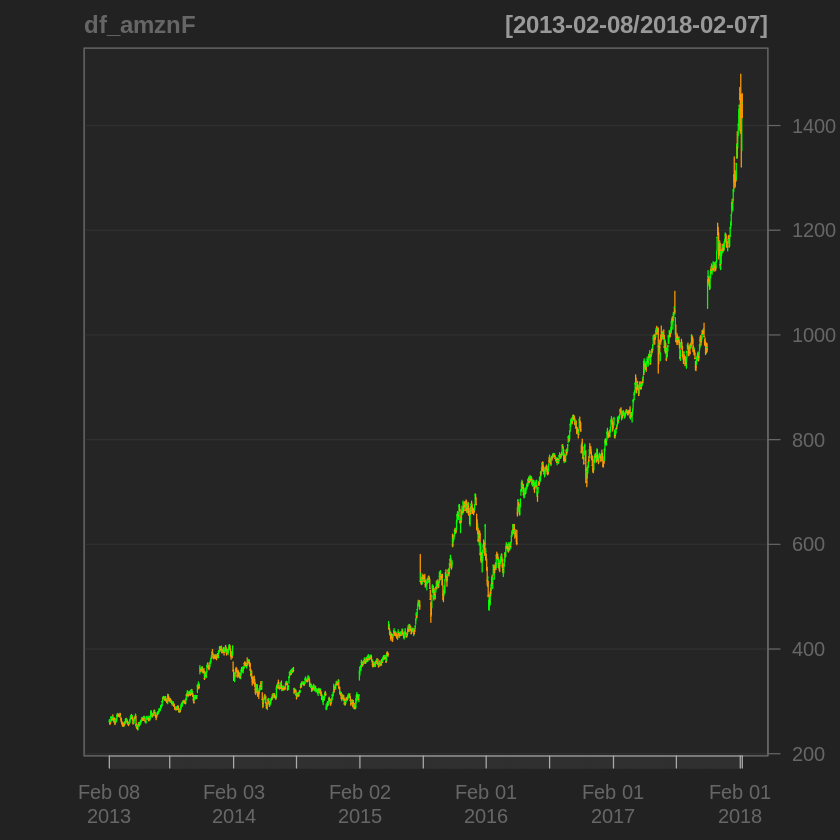

In [ ]:
barChart(df_amznF, bar.type = 'hlc', TA = NULL)

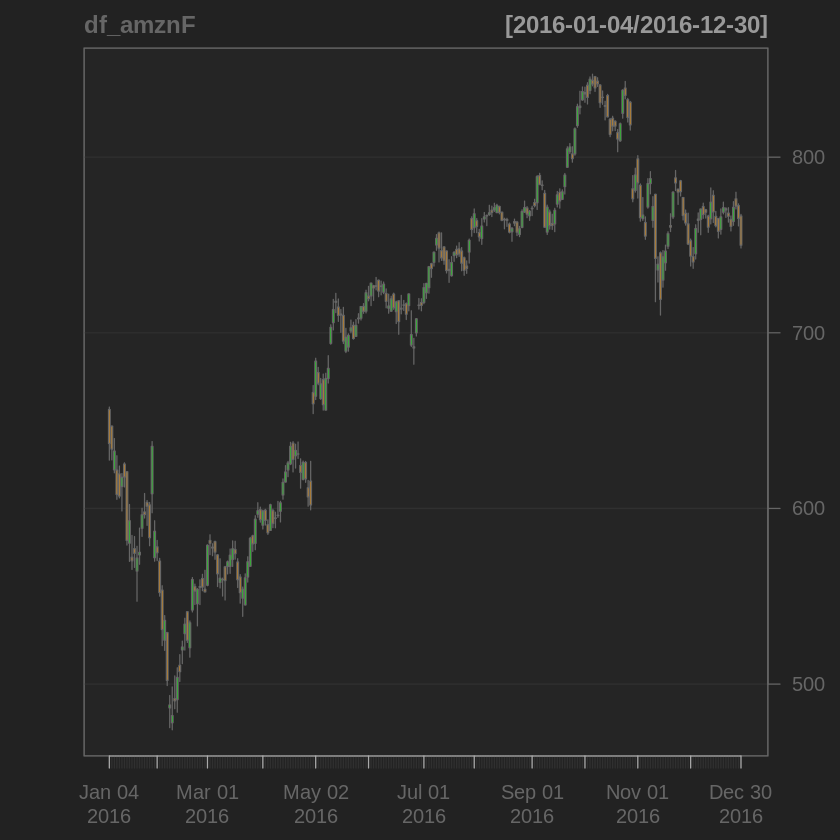

In [ ]:
candleChart(df_amznF, TA=NULL, subset = '2016')

Add MACD

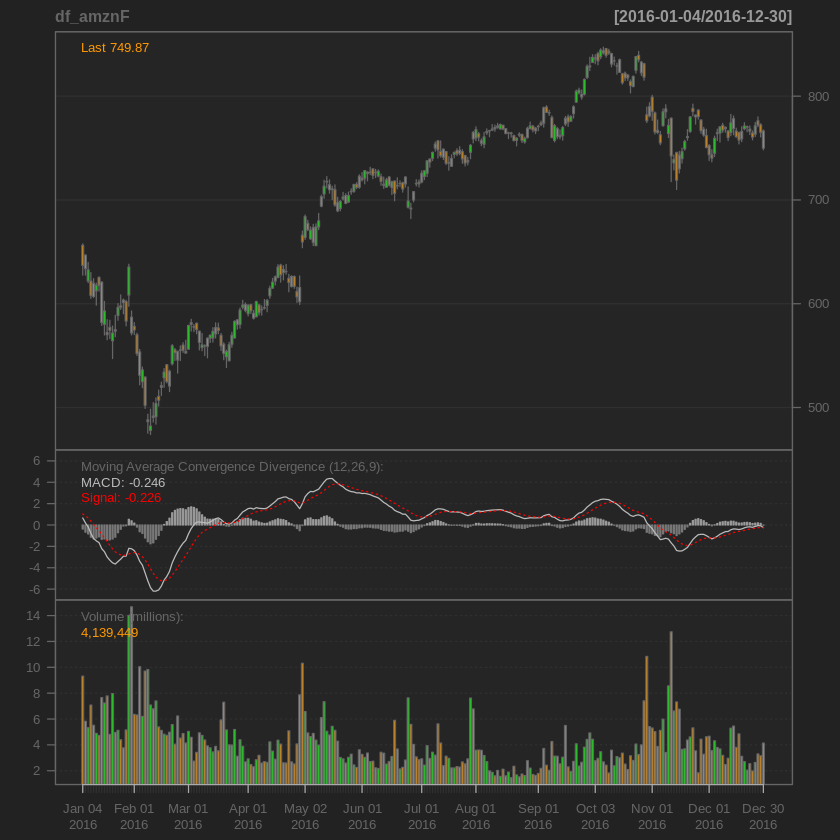

In [ ]:
candleChart(df_amznF, TA=c(addMACD(),addVo()), subset = '2016')

addMACD(fast = 12, slow = 26, signal = 9, type = “EMA”, histogram = TRUE, col)

Various ways to dictate time, in this case everything after… Also added in ADX

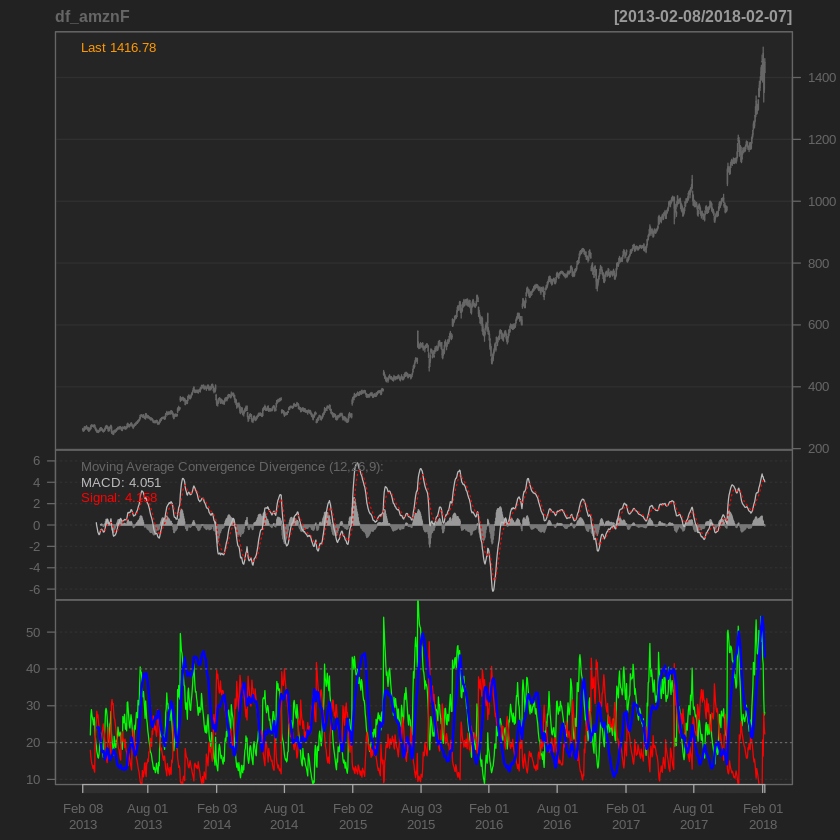

In [ ]:
candleChart(df_amznF, TA=c(addMACD(),addADX()), subset = '2013-01::')

Various ways to dictate time, in this case everything in between… Background is the ‘Theme’

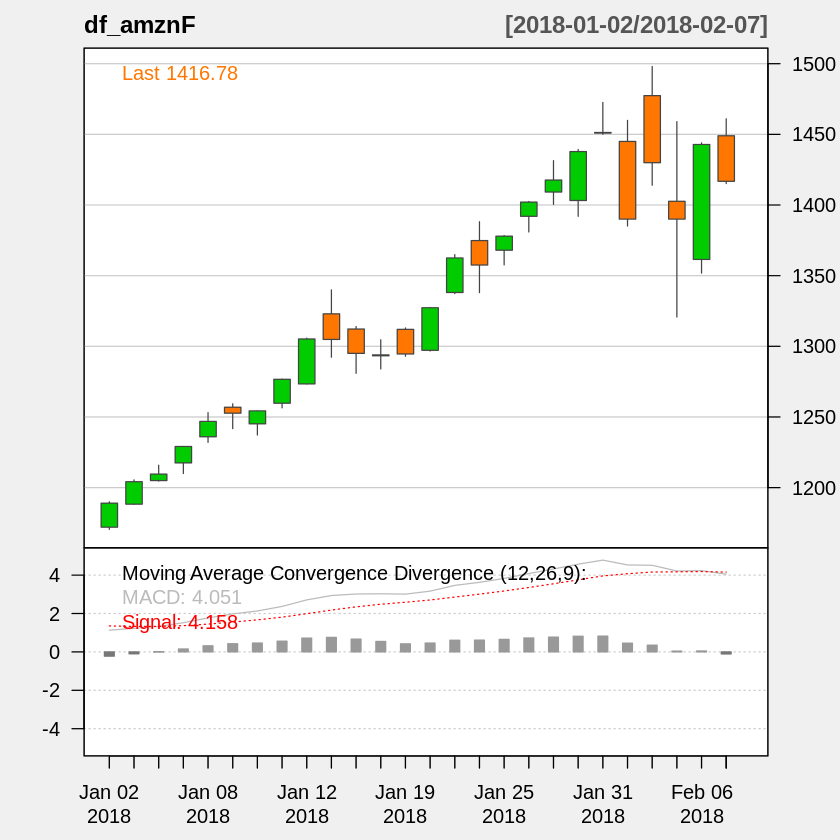

In [ ]:
candleChart(df_amznF , TA=c(addMACD()), subset = '2018-01::2018-05', theme = 'white')

Adding indicators starts here - although we jumped ahead up above
We’ll use TTR, which is installed with quantmod, if not you can install TTR TTR - Technical Trading Rules So Cool!




Let’s do a Simple Moving Average

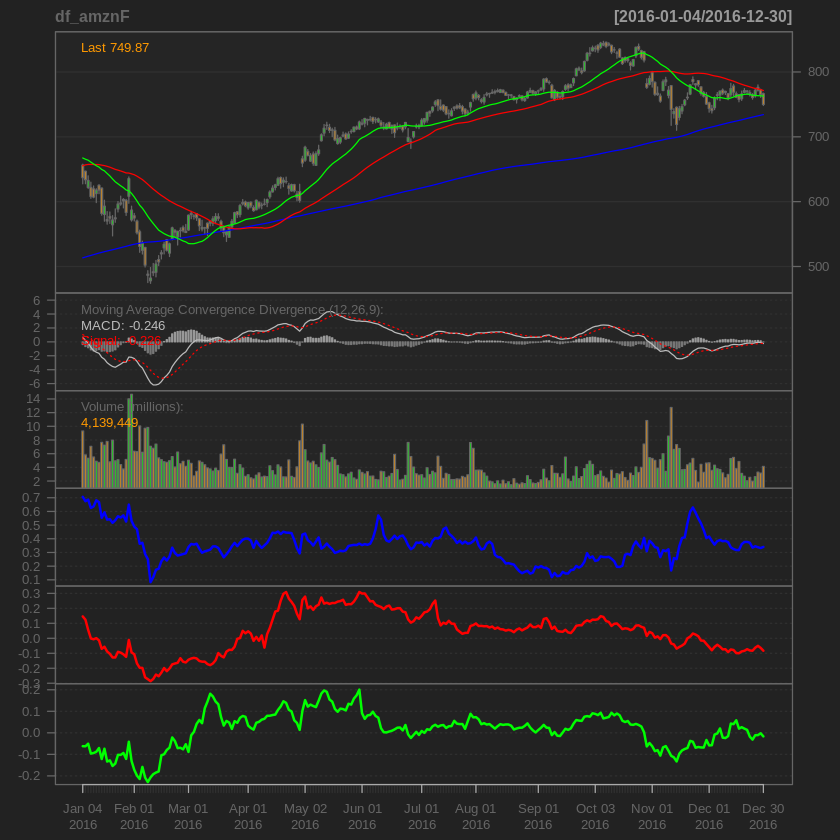

In [ ]:
chartSeries(df_amznF,
            type = c("auto", "matchsticks"),
            subset = '2016-01::2016-12',
            show.grid = TRUE,
            major.ticks='auto', minor.ticks=TRUE,
            multi.col = FALSE,
            TA=c(addMACD(),addVo(),addSMA(n=200,col = 'blue'),addSMA(n=50,col = 'red'),addSMA(n=22,col = 'green'),
            addROC(n=200,col = 'blue'),addROC(n=50,col = 'red'),addROC(n=22,col = 'green'))) # rate of change

Experimental BBands “The primary addition to this function call over the TTR version is in the draw argument. ‘bands’ will draw standard Bollinger Bands, ‘percent’ will draw Bollinger %b and ‘width’ will draw Bolinger Bands Width. The last two will be drawn in new figure regions.”



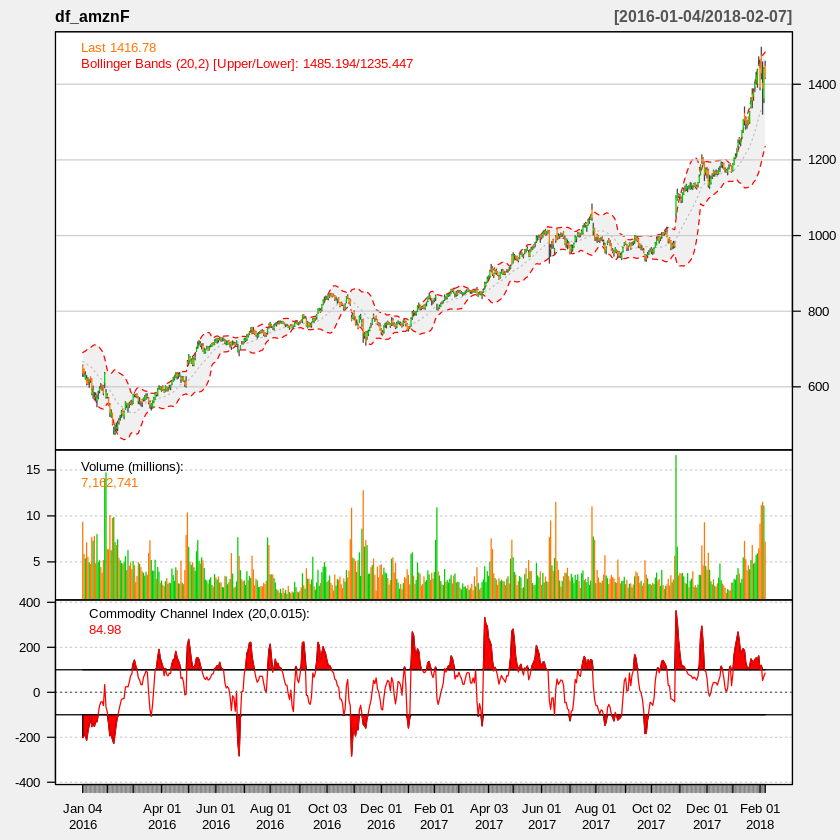

In [ ]:
chartSeries(df_amznF, theme="white",
 TA="addVo();addBBands();addCCI()", subset = '2016-01::')

Multiple Moving Averages

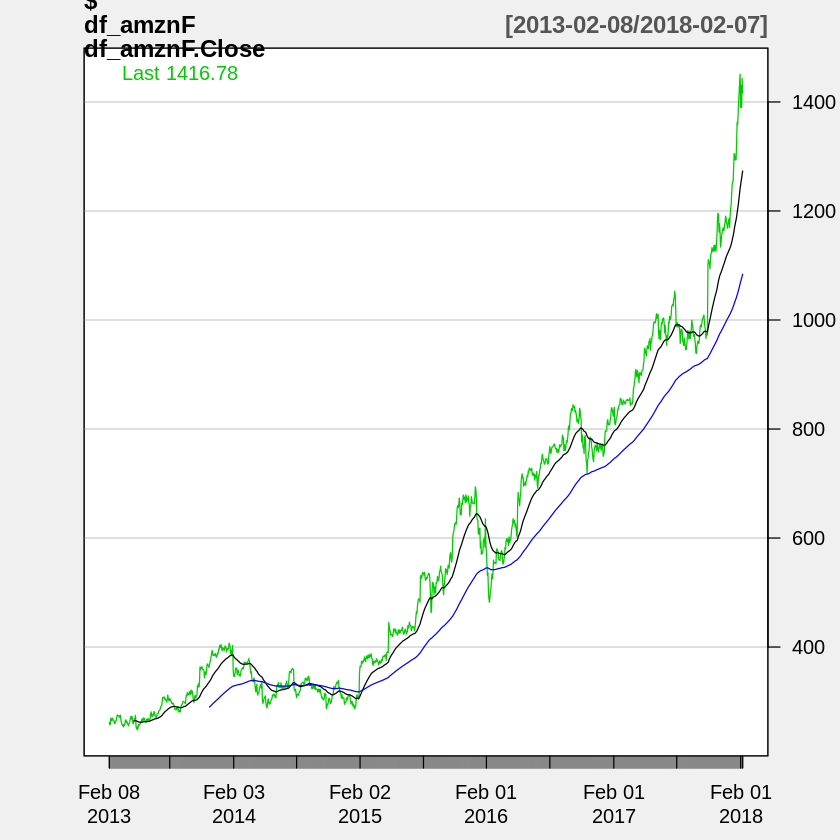

In [ ]:
chartSeries(df_amznF$df_amznF.Close, theme="white", TA="addEMA(50, col='black');addEMA(200, col='blue')")

Let’s pull in TTR package 50 - 200 MA

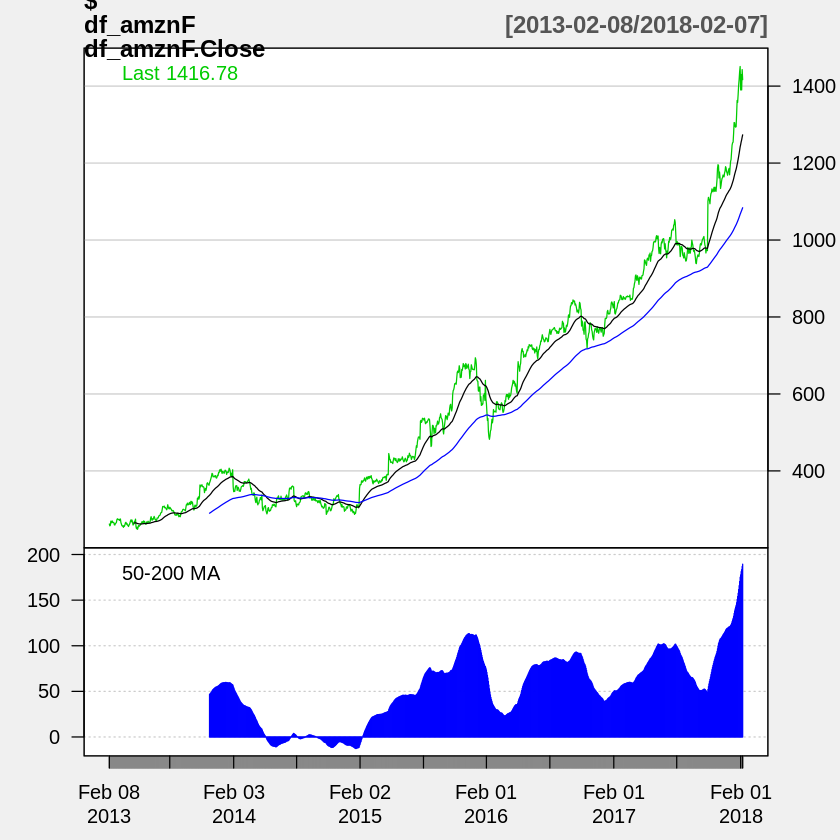

In [ ]:
df_amznF.EMA.50<- EMA(df_amznF$df_amznF.Close, n=50, )
df_amznF.EMA.200<- EMA(df_amznF$df_amznF.Close, n=200, )
addTA(df_amznF.EMA.50 - df_amznF.EMA.200,col='blue', type='h',legend="50-200 MA")

What this fast - slow tells us is that when it is above 0 (positive) things are bullish and when things are negative things are bullish.

In [ ]:
min(df_amzn$low)

#looking for min value of the date variable
max(df_amzn$high)

[1] 245.75

[1] 1498

HIghest value of amazon stock in feb 2018

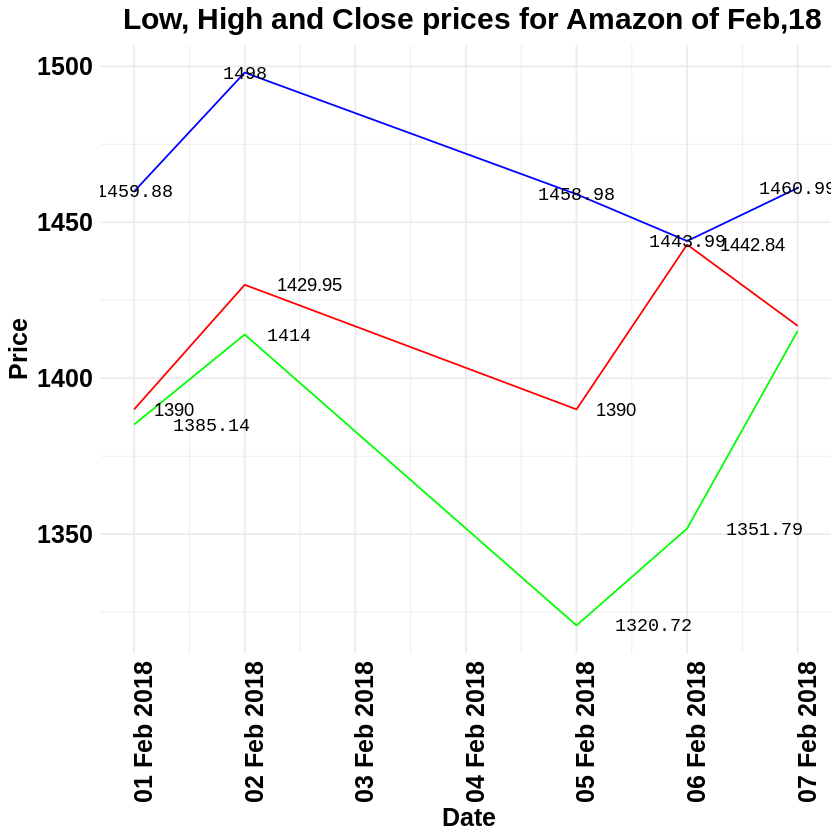

In [ ]:
df_amzn$Year <- year(df_amzn$date)
df_amzn$Month <- month(df_amzn$date)

#filtered data for month of january 2018
aal_jan_2018 <- df_amzn%>% filter(Year == 2018 & Month== 2)

ggplot(aal_jan_2018, aes(x= date))+
labs(title = "Low, High and Close prices for Amazon of Feb,18", x = " Date", y = "Price")+
geom_line(aes(x = date, y = close), color = "red")+
geom_line(aes(x = date, y = high), color = "blue")+
geom_line(aes(x = date, y = low), color = "green")+
geom_text(aes(x= date, y = low, label = low), color = "black", family= "bold", hjust = -0.5)+
geom_text(aes(x= date, y = high, label = high), color = "black", family ="bold")+
geom_text(aes (x = date, y = close, label = close), color ="black", hjust = -0.5)+
scale_x_date(date_breaks = "1 day",date_labels = "%d %b %Y") +
theme_minimal()+
theme(
plot.title = element_text(face = "bold", size =18, color = "black", hjust = 0.7),
axis.title.x = element_text(color = "black", size =15, face= "bold"),
axis.title.y = element_text(color = "black", size =15, face= "bold"),
axis.text.x = element_text(color = "black", size = 15, face = "bold", angle = 90),
axis.text.y = element_text(color = "black", size =15, face= "bold"))

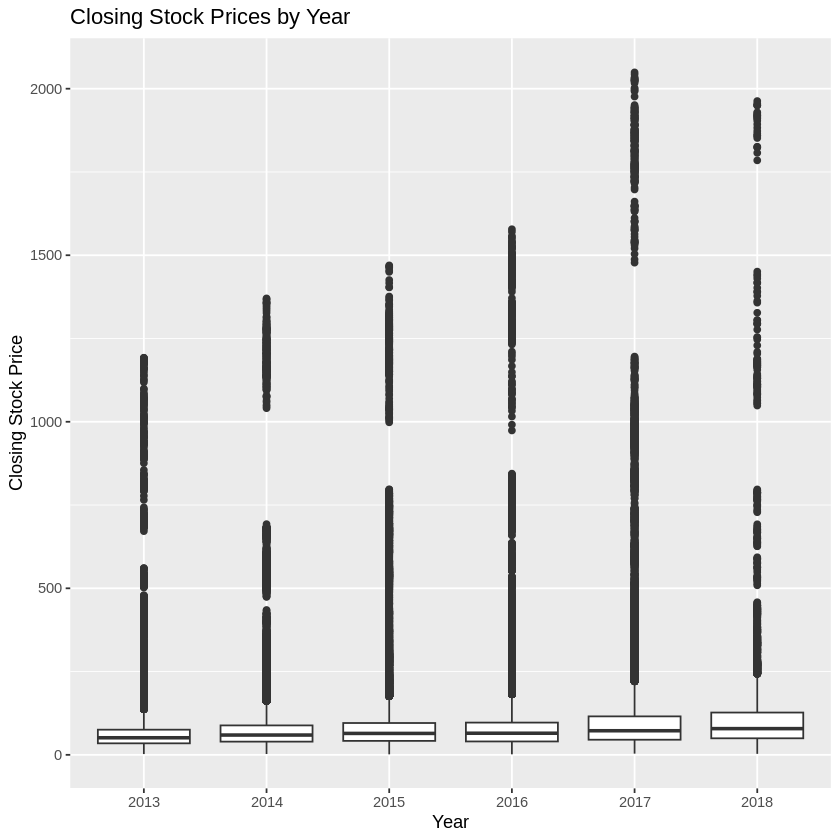

In [ ]:
library(lubridate)
df$year <- year(df$date)
# Load required libraries
library(ggplot2)

# Create a boxplot
ggplot(df, aes(x = factor(year), y = close)) +
  geom_boxplot() +
  labs(title = "Closing Stock Prices by Year",
       x = "Year",
       y = "Closing Stock Price")

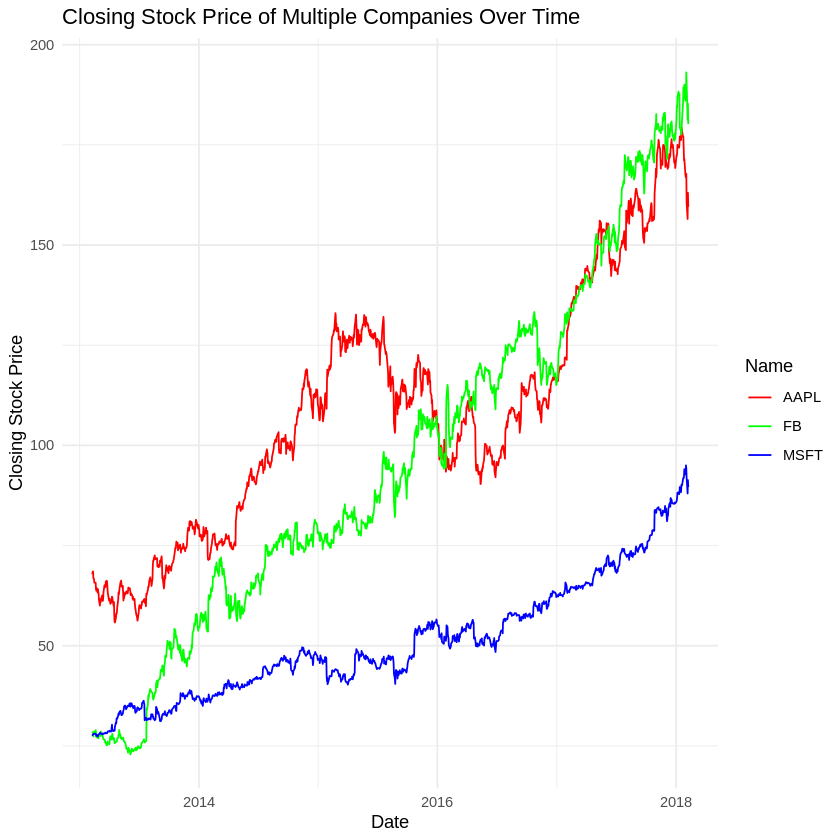

In [ ]:
df$date <- as.Date(df$date)

companies <- c('MSFT', 'AAPL', 'FB')
ggplot(df[df$Name %in% companies, ], aes(x=date, y=close, color=Name)) + geom_line() +
  labs(title='Closing Stock Price of Multiple Companies Over Time',
       x='Date',
       y='Closing Stock Price') +
  scale_color_manual(values=c('MSFT'='blue', 'AAPL'='red', 'FB'='green')) +
  theme_minimal()

In [ ]:
df_all_aapl <- head(df %>% filter(Name == "AAPL" ), 1259)
df_all_fb <- head(df %>% filter(Name == "FB" ), 1259)

df_all_aapl_close <- df_all_aapl$close
df_all_fb_close <- df_all_fb$close


# Compute the correlation coefficients
correlation1 <- cor(df_all_aapl_close, df_all_fb_close)

correlation1

[1] 0.8964132

In [ ]:
Risk ANalysis

In [16]:
rets <- data.frame(
  Open = c(NA, diff(df_amznF$df_amznF.Open) / lag(df_amznF$df_amznF.Open)),
  Close = c(NA, diff(df_amznF$df_amznF.Close) / lag(df_amznF$df_amznF.Close)),
  High = c(NA, diff(df_amznF$df_amznF.High) / lag(df_amznF$df_amznF.High)),
  Low = c(NA, diff(df_amznF$df_amznF.Low) / lag(df_amznF$df_amznF.Low))
)

# Drop the first row which will have NA values since there's no previous data to calculate returns
rets <- rets[-1, ]

In [20]:
df_msft <- df %>% filter(Name == "MSFT")
df_msft$date <- as.Date(df_msft$date)

df_msft_summary <- df_msft[, 1:6]

df_msftF <- as.xts(df_msft_summary)
names(df_msftF)
names(df_msftF) <- c("df_msftF.Open"   ,  "df_msftF.High"   ,  "df_msftF.Low"   ,   "df_msftF.Close"  ,  "df_msftF.Volume")
names(df_msftF)

df_FB <- df %>% filter(Name == "FB")
df_FB$date <- as.Date(df_FB$date)

df_FB_summary <- df_FB[, 1:6]

df_FBF <- as.xts(df_FB_summary)
names(df_FBF)
names(df_FBF) <- c("df_FBF.Open"   ,  "df_FBF.High"   ,  "df_FBF.Low"   ,   "df_FBF.Close"  ,  "df_FBF.Volume")

[1] "open"   "high"   "low"    "close"  "volume"

[1] "df_msftF.Open"   "df_msftF.High"   "df_msftF.Low"    "df_msftF.Close" 
[5] "df_msftF.Volume"

[1] "open"   "high"   "low"    "close"  "volume"

In [21]:
# Assuming you have a dataframe named 'stock_data' containing columns 'Open', 'Close', 'High', 'Low'

# Calculate daily returns
df_amznF$Daily_Returns <- (df_amznF$df_amznF.Close - df_amznF$df_amznF.Open) / df_amznF$df_amznF.Open
df_msftF$Daily_Returns <- (df_msftF$df_msftF.Close - df_msftF$df_msftF.Open) / df_msftF$df_msftF.Open
df_FBF$Daily_Returns <- (df_FBF$df_FBF.Close - df_FBF$df_FBF.Open) / df_FBF$df_FBF.Open

# Calculate expected return (mean of daily returns)
amzn_expected_return <- mean(df_amznF$Daily_Returns)
msft_expected_return <- mean(df_msftF$Daily_Returns)
FB_expected_return <- mean(df_FBF$Daily_Returns)

# Calculate risk (standard deviation of daily returns)
amzn_risk <- sd(df_amznF$Daily_Returns)
msft_risk <- sd(df_msftF$Daily_Returns)
FB_risk <- sd(df_FBF$Daily_Returns)

# Print the results
cat("amzn_Expected Return:", amzn_expected_return, "\n")
cat("amzn_Risk (Standard Deviation):", amzn_risk, "\n")
cat("msft_Expected Return:", msft_expected_return, "\n")
cat("msft_Risk (Standard Deviation):", msft_risk, "\n")
cat("FB_Expected Return:", FB_expected_return, "\n")
cat("FB_Risk (Standard Deviation):", FB_risk, "\n")

amzn_Expected Return: 0.0001792657 
amzn_Risk (Standard Deviation): 0.01350358 
msft_Expected Return: 0.0008768041 
msft_Risk (Standard Deviation): 0.0105933 
FB_Expected Return: 0.0001874959 
FB_Risk (Standard Deviation): 0.01540717 


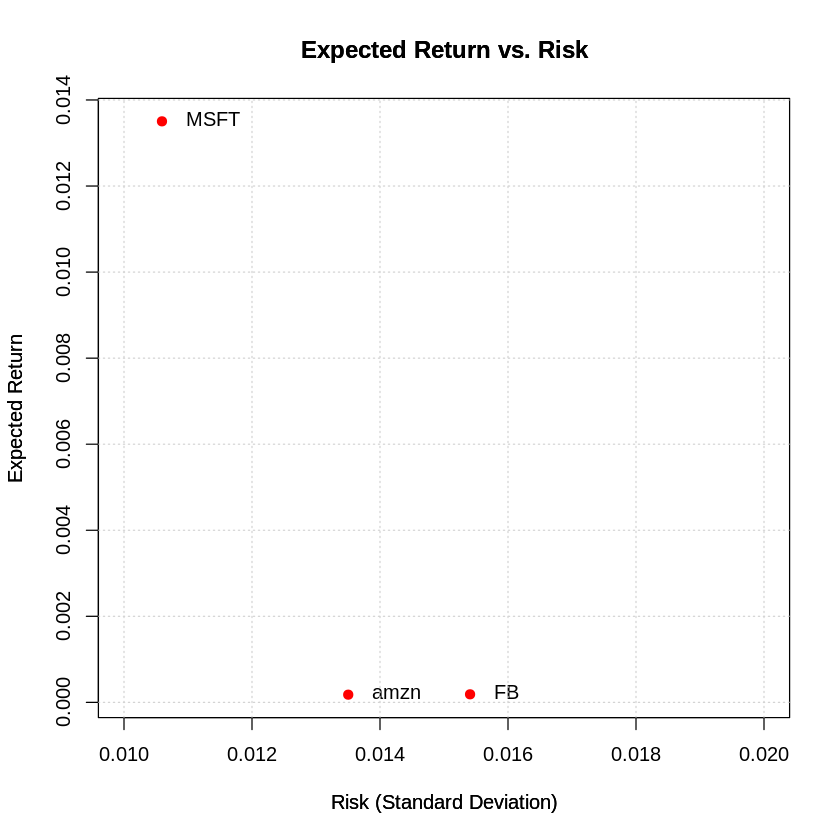

In [22]:
# Data
expected_returns <- c(0.0001792657, 0.01350358,0.0001874959)
risks <- c(0.01350358, 0.0105933,0.01540717)
labels <- c("amzn", "MSFT","FB")

# Create a scatter plot
plot(x = risks, y = expected_returns,
     xlab = "Risk (Standard Deviation)", ylab = "Expected Return",
     main = "Expected Return vs. Risk",
     xlim = range(0.01,0.02), ylim = range(expected_returns),
     pch = 19,col="red")

# Add annotations for each point
text(x = risks, y = expected_returns, labels = labels, pos = 4, offset = 1)

# Add gridlines for better visualization
grid()

# Add title and axis labels
title(main = "Expected Return vs. Risk", xlab = "Risk (Standard Deviation)", ylab = "Expected Return")

INDIAN STOCK MARKET ANALYSIS

In [1]:
df_nifty <- read.csv("NIftyy50.csv")
install.packages('quantmod')

library(quantmod)
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’


Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::first()  masks xts::first()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::last()   masks xts::last()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>)

In [ ]:
df_nifty

In [ ]:
df_adani <- df_nifty %>% filter(Name == "ADANIPORTS")
library(lubridate)
install.packages("lubridate")
df_adani$Date <- dmy(df_adani$Date)
df_adani

In [ ]:
df_adani_summary <- df_adani[, 1:7]
#df_adani_summary$Date <- as.Date(df_adani_summary$Date)
df_adaniF <- as.xts(df_adani_summary)
names(df_adaniF)

[1] "Open"   "High"   "Low"    "Close"  "VWAP"   "Volume"

In [ ]:
summary(`df_adani_summary`)

      Date                 Open            High            Low       
 Min.   :2013-01-01   Min.   :118.7   Min.   :124.8   Min.   :116.7  
 1st Qu.:2014-06-26   1st Qu.:203.7   1st Qu.:207.7   1st Qu.:200.8  
 Median :2015-12-31   Median :290.1   Median :294.7   Median :285.1  
 Mean   :2015-12-29   Mean   :278.7   Mean   :283.1   Mean   :273.7  
 3rd Qu.:2017-07-01   3rd Qu.:349.9   3rd Qu.:357.5   3rd Qu.:345.2  
 Max.   :2018-12-31   Max.   :450.0   Max.   :452.4   Max.   :434.8  
     Close            VWAP           Volume        
 Min.   :122.0   Min.   :121.5   Min.   :   29097  
 1st Qu.:203.8   1st Qu.:203.8   1st Qu.: 1910154  
 Median :289.9   Median :290.1   Median : 2862705  
 Mean   :278.3   Mean   :278.5   Mean   : 3491703  
 3rd Qu.:351.2   3rd Qu.:350.5   3rd Qu.: 4307322  
 Max.   :448.8   Max.   :440.9   Max.   :30058587  

In [ ]:
names(df_adaniF) <- c( "df_adaniF.Open"   ,  "df_adaniF.High"   ,  "df_adaniF.Low"   ,   "df_adaniF.Close"  ,"df_adaniF.Vwap",  "df_adaniF.Volume")
names(df_adaniF)

[1] "df_adaniF.Open"   "df_adaniF.High"   "df_adaniF.Low"    "df_adaniF.Close" 
[5] "df_adaniF.Vwap"   "df_adaniF.Volume"

In [ ]:
summary(`df_adani_summary`)

      Date                 Open            High            Low       
 Min.   :2013-01-01   Min.   :118.7   Min.   :124.8   Min.   :116.7  
 1st Qu.:2014-06-26   1st Qu.:203.7   1st Qu.:207.7   1st Qu.:200.8  
 Median :2015-12-31   Median :290.1   Median :294.7   Median :285.1  
 Mean   :2015-12-29   Mean   :278.7   Mean   :283.1   Mean   :273.7  
 3rd Qu.:2017-07-01   3rd Qu.:349.9   3rd Qu.:357.5   3rd Qu.:345.2  
 Max.   :2018-12-31   Max.   :450.0   Max.   :452.4   Max.   :434.8  
     Close            VWAP           Volume        
 Min.   :122.0   Min.   :121.5   Min.   :   29097  
 1st Qu.:203.8   1st Qu.:203.8   1st Qu.: 1910154  
 Median :289.9   Median :290.1   Median : 2862705  
 Mean   :278.3   Mean   :278.5   Mean   : 3491703  
 3rd Qu.:351.2   3rd Qu.:350.5   3rd Qu.: 4307322  
 Max.   :448.8   Max.   :440.9   Max.   :30058587  

In [ ]:
df_adani_summary <- df_adani[, 1:8]

for (colname in colnames(df_adani_summary)) {
  cat("Statistical Distribution of", colname, "\n")

  if (is.numeric(df_adani_summary[[colname]])) {
    cat(
        "| SD : ", sd(df_adani_summary[[colname]]),
        "| Var :", var(df_adani_summary[[colname]]),
        "| IQR(Q3 - Q1) :", IQR(df_adani_summary[[colname]]),
        "\n\n")
  } else {
    cat("Column is not numeric.\n")
  }
}

Statistical Distribution of Date 
Column is not numeric.
Statistical Distribution of Open 
| SD :  88.29547 | Var : 7796.089 | IQR(Q3 - Q1) : 146.15 

Statistical Distribution of High 
| SD :  88.89103 | Var : 7901.614 | IQR(Q3 - Q1) : 149.75 

Statistical Distribution of Low 
| SD :  87.23178 | Var : 7609.384 | IQR(Q3 - Q1) : 144.4 

Statistical Distribution of Close 
| SD :  88.11963 | Var : 7765.069 | IQR(Q3 - Q1) : 147.45 

Statistical Distribution of VWAP 
| SD :  88.07234 | Var : 7756.738 | IQR(Q3 - Q1) : 146.685 

Statistical Distribution of Volume 
| SD :  2682186 | Var : 7.194121e+12 | IQR(Q3 - Q1) : 2397168 

Statistical Distribution of Name 
Column is not numeric.


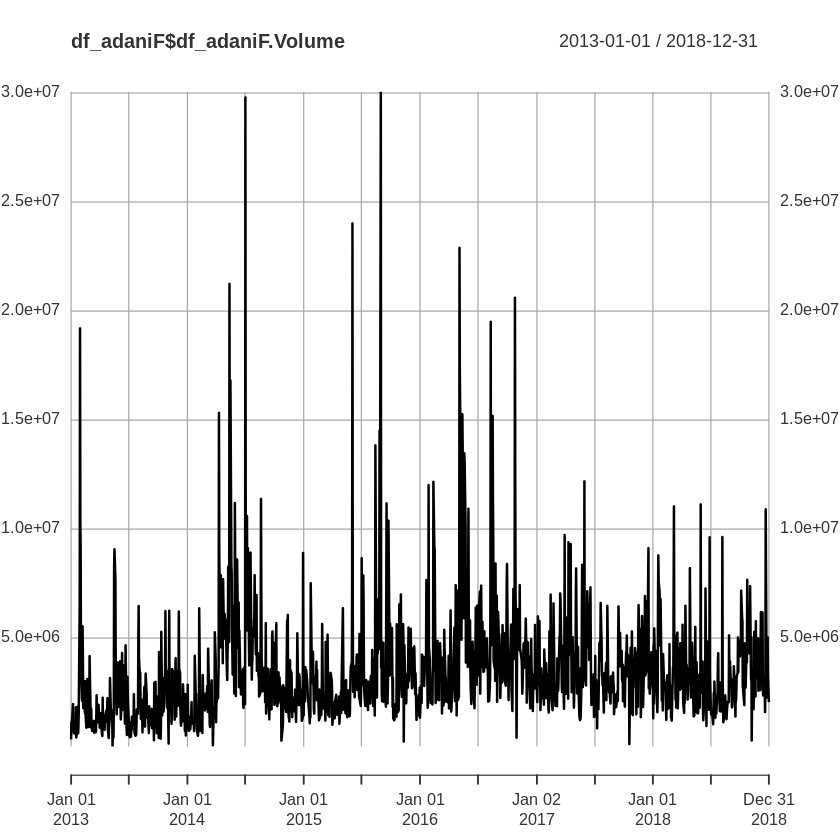

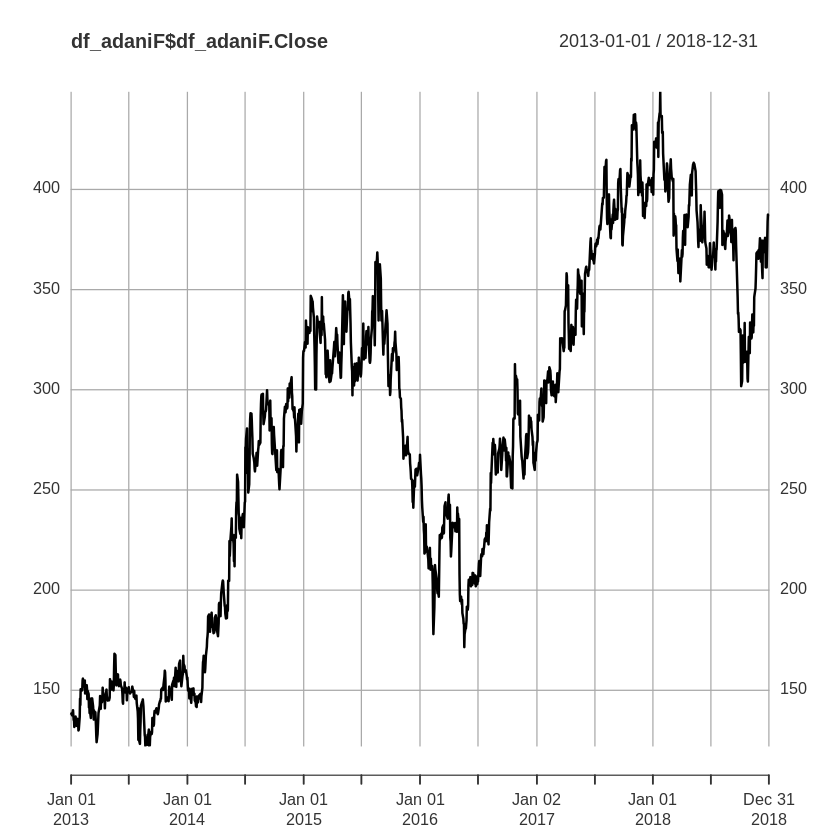

In [ ]:
plot.xts(df_adaniF$df_adaniF.Volume)  plot.xts(df_adaniF$df_adaniF.Close)

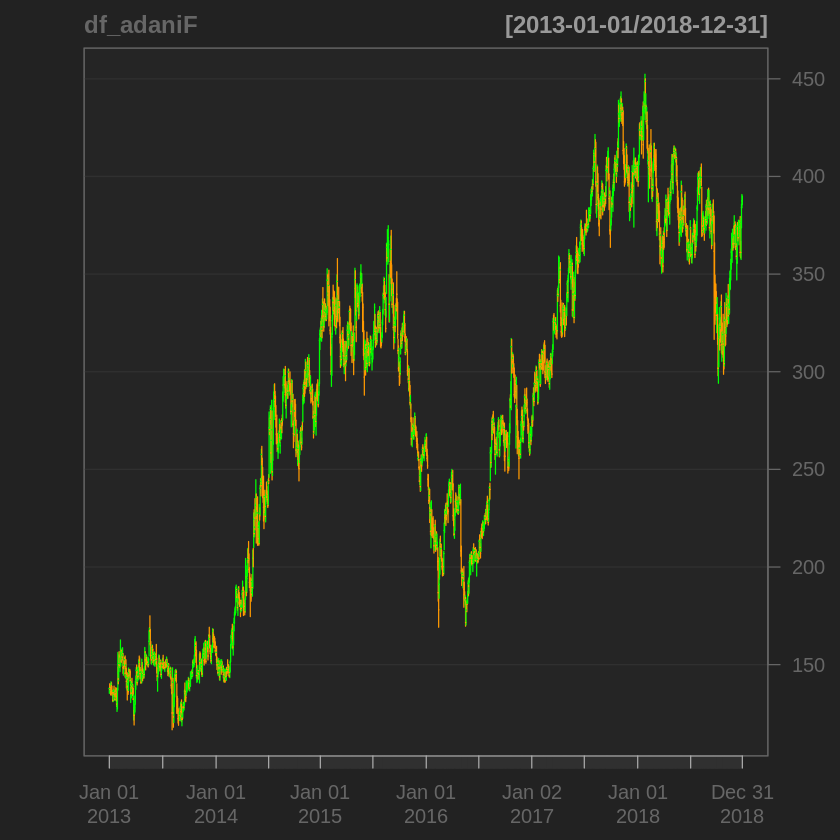

In [ ]:
barChart(df_adaniF, bar.type = 'hlc', TA = NULL)

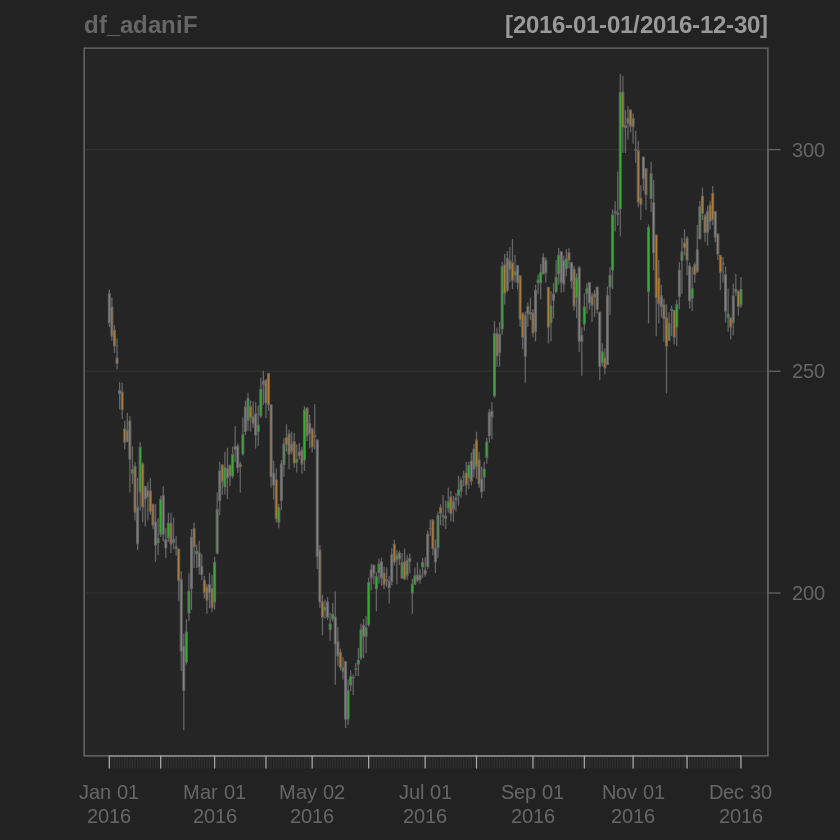

In [ ]:
candleChart(df_adaniF, TA=NULL, subset = '2016')

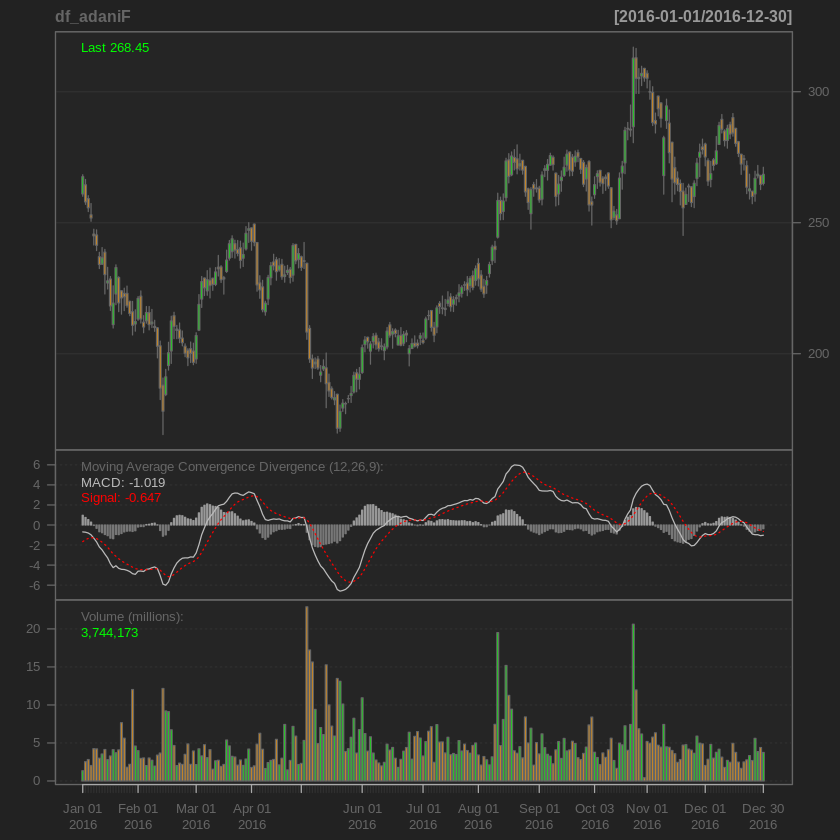

In [ ]:
candleChart(df_adaniF, TA=c(addMACD(),addVo()), subset = '2016')

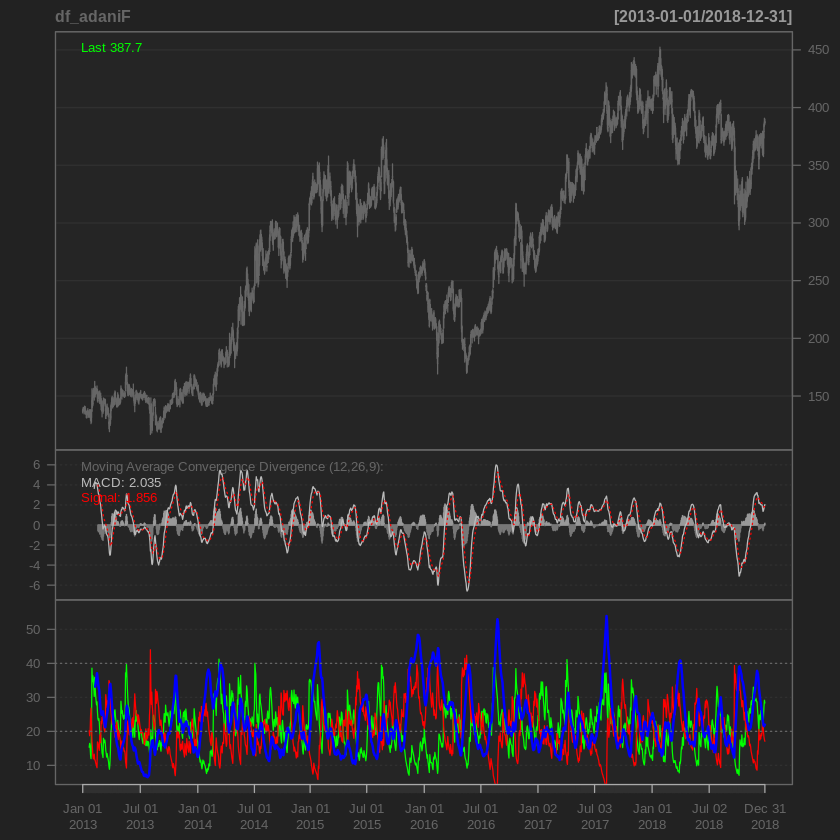

In [ ]:
candleChart(df_adaniF, TA=c(addMACD(),addADX()), subset = '2013-01::')

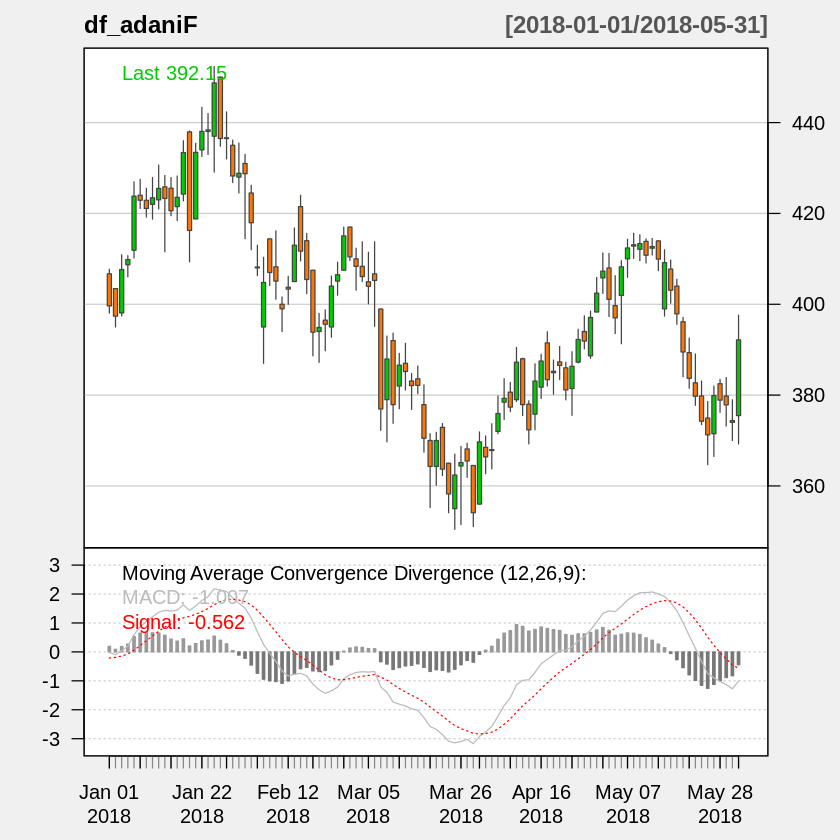

In [ ]:
candleChart(df_adaniF , TA=c(addMACD()), subset = '2018-01::2018-05', theme = 'white')

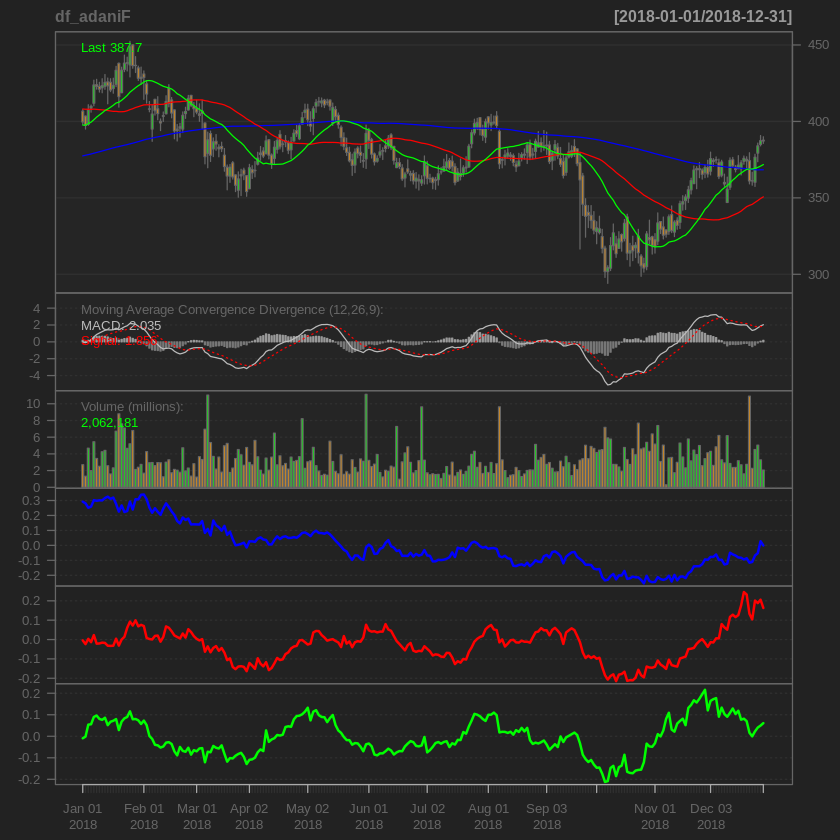

In [ ]:
chartSeries(df_adaniF,
            type = c("auto", "matchsticks"),
            subset = '2018-01::',
            show.grid = TRUE,
            major.ticks='auto', minor.ticks=TRUE,
            multi.col = FALSE,
            TA=c(addMACD(),addVo(),addSMA(n=200,col = 'blue'),addSMA(n=50,col = 'red'),addSMA(n=22,col = 'green'),
            addROC(n=200,col = 'blue'),addROC(n=50,col = 'red'),addROC(n=22,col = 'green'))) # rate of change

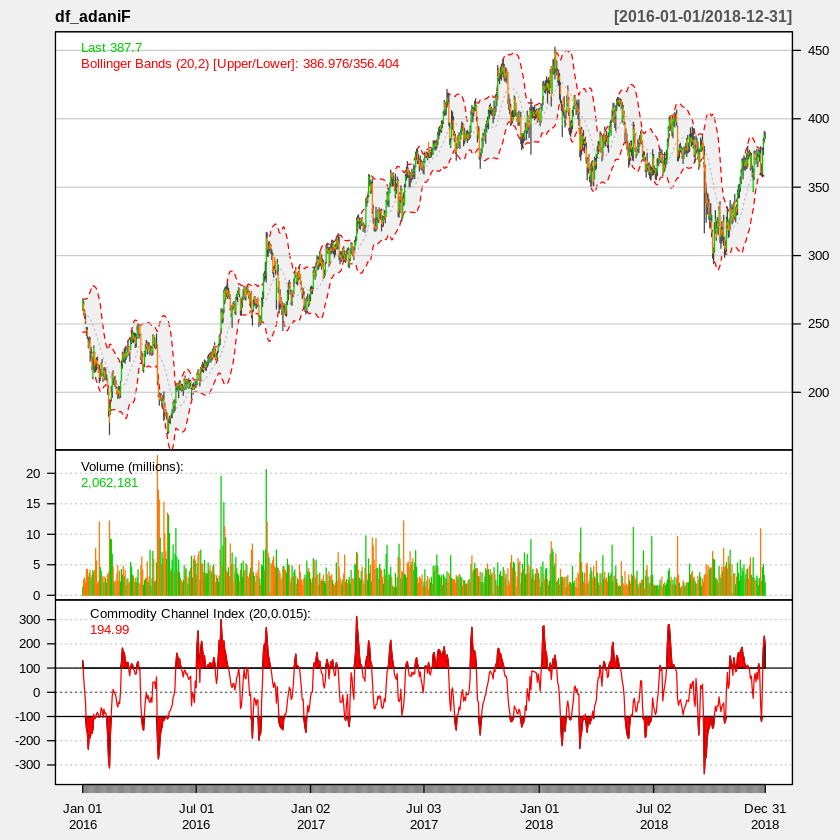

In [ ]:
chartSeries(df_adaniF, theme="white",
 TA="addVo();addBBands();addCCI()", subset = '2016-01::')

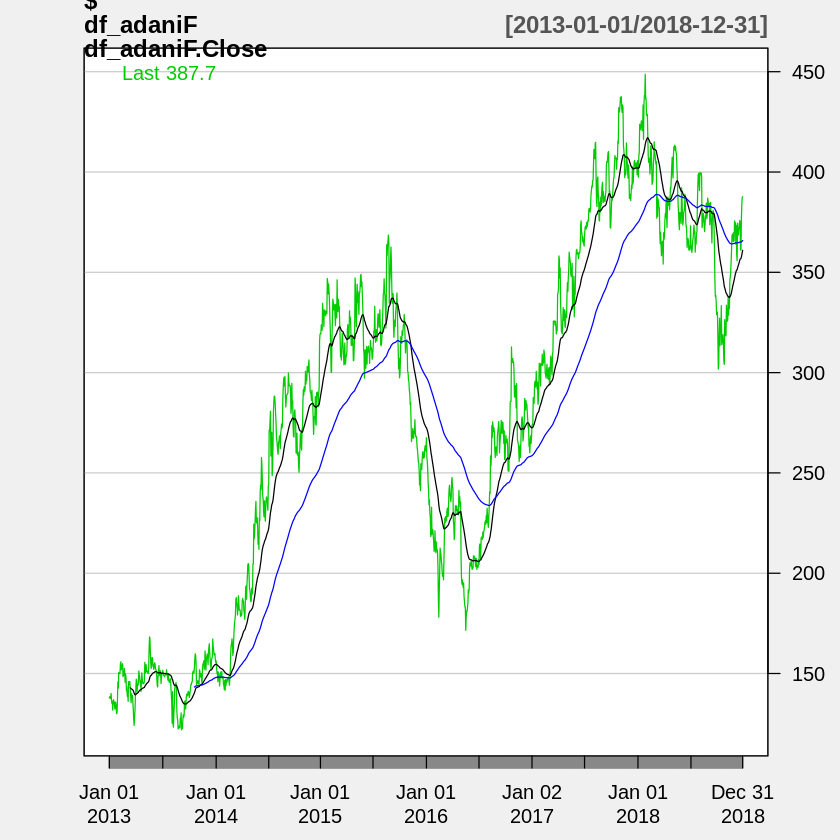

In [ ]:
chartSeries(df_adaniF$df_adaniF.Close, theme="white", TA="addEMA(50, col='black');addEMA(200, col='blue')")

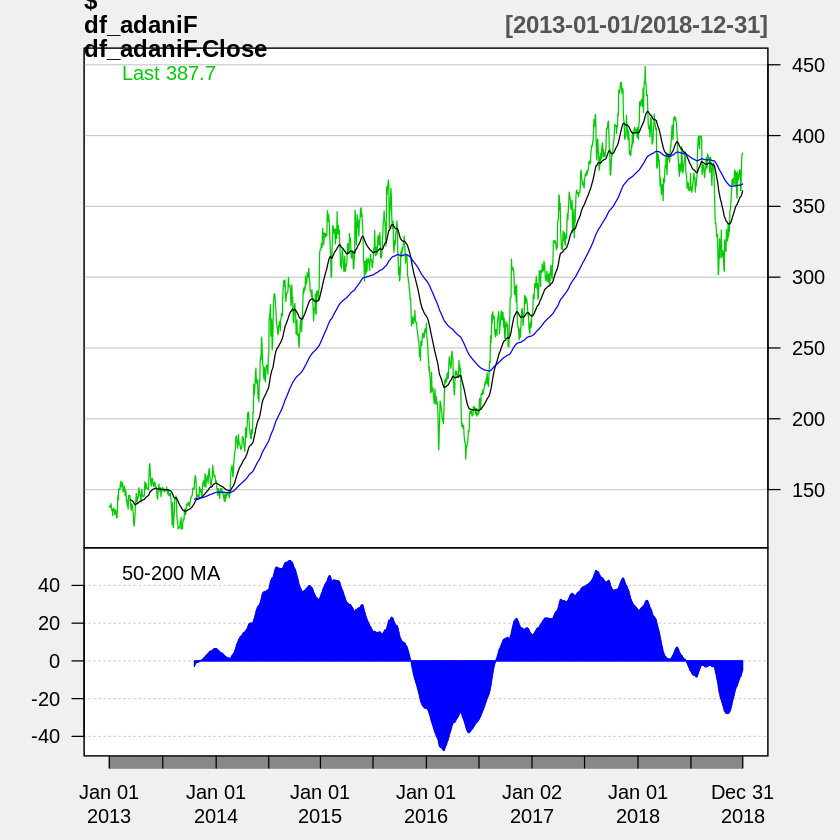

In [ ]:
df_adaniF.EMA.50<- EMA(df_adaniF$df_adaniF.Close, n=50, )
df_adaniF.EMA.200<- EMA(df_adaniF$df_adaniF.Close, n=200, )
addTA(df_adaniF.EMA.50 - df_adaniF.EMA.200,col='blue', type='h',legend="50-200 MA")

In [ ]:
min(df_adaniF$df_adaniF.Low)

#looking for min value of the date variable
max(df_adaniF$df_adaniF.High)

[1] 116.65

[1] 452.35

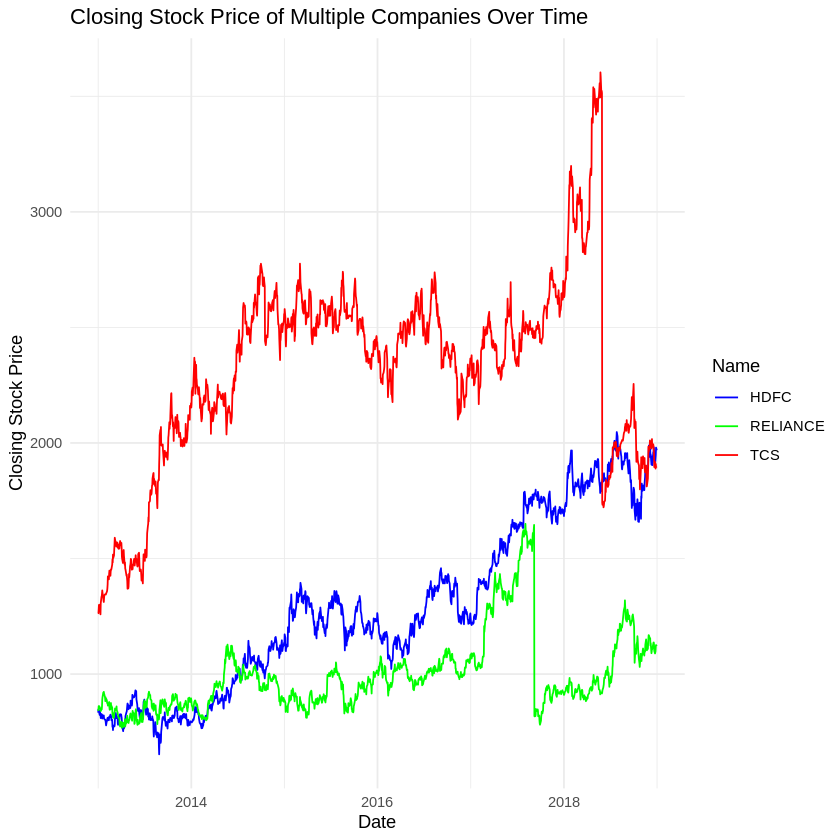

In [ ]:
df_nifty$Date <- dmy(df_nifty$Date)

companies <- c('HDFC', 'TCS', 'RELIANCE')
ggplot(df_nifty[df_nifty$Name %in% companies, ], aes(x=Date, y=Close, color=Name)) + geom_line() +
  labs(title='Closing Stock Price of Multiple Companies Over Time',
       x='Date',
       y='Closing Stock Price') +
  scale_color_manual(values=c('HDFC'='blue', 'TCS'='red', 'RELIANCE'='green')) +
  theme_minimal()

In [ ]:
df_tcs <- head(df_nifty %>% filter(Name == "TCS" ), 1259)
df_reliance <- head(df_nifty %>% filter(Name == "RELIANCE" ), 1259)

df_all_aapl_close <- df_tcs$Close
df_all_fb_close <- df_reliance$Close


# Compute the correlation coefficients
correlation1 <- cor(df_tcs_close, df_reliance_close)

correlation1

[1] 0.31201

Risk Analysis

In [2]:
df_adani <- df_nifty %>% filter(Name == "ADANIPORTS")
df_adani$Date <- dmy(df_adani$Date)
df_adani_summary <- df_adani[, 1:7]
#df_adani_summary$Date <- as.Date(df_adani_summary$Date)
df_adaniF <- as.xts(df_adani_summary)
names(df_adaniF) <- c( "df_adaniF.Open"   ,  "df_adaniF.High"   ,  "df_adaniF.Low"   ,   "df_adaniF.Close"  ,"df_adaniF.Vwap",  "df_adaniF.Volume")

df_hdfc <- df_nifty %>% filter(Name == "HDFC")
df_hdfc$Date <- dmy(df_hdfc$Date)
df_hdfc_summary <- df_hdfc[, 1:7]
df_hdfcF <- as.xts(df_hdfc_summary)
names(df_hdfcF) <- c( "df_hdfcF.Open"   ,  "df_hdfcF.High"   ,  "df_hdfcF.Low"   ,   "df_hdfcF.Close"  ,"df_hdfcF.Vwap",  "df_hdfcF.Volume")

df_tcs <- df_nifty %>% filter(Name == "TCS")
df_tcs$Date <- dmy(df_tcs$Date)
df_tcs_summary <- df_tcs[, 1:7]
df_tcsF <- as.xts(df_tcs_summary)
names(df_tcsF) <- c( "df_tcsF.Open"   ,  "df_tcsF.High"   ,  "df_tcsF.Low"   ,   "df_tcsF.Close"  ,"df_tcsF.Vwap",  "df_tcsF.Volume")

calculate expected returns and risk

In [3]:
# Calculate daily returns
df_adaniF$Daily_Returns <- (df_adaniF$df_adaniF.Close - df_adaniF$df_adaniF.Open) / df_adaniF$df_adaniF.Open
df_hdfcF$Daily_Returns <- (df_hdfcF$df_hdfcF.Close - df_hdfcF$df_hdfcF.Open) / df_hdfcF$df_hdfcF.Open
df_tcsF$Daily_Returns <- (df_tcsF$df_tcsF.Close - df_tcsF$df_tcsF.Open) / df_tcsF$df_tcsF.Open

# Calculate expected return (mean of daily returns)
adani_expected_return <- mean(df_adaniF$Daily_Returns)
hdfc_expected_return <- mean(df_hdfcF$Daily_Returns)
tcs_expected_return <- mean(df_tcsF$Daily_Returns)

# Calculate risk (standard deviation of daily returns)
adani_risk <- sd(df_adaniF$Daily_Returns)
hdfc_risk <- sd(df_hdfcF$Daily_Returns)
tcs_risk <- sd(df_tcsF$Daily_Returns)

# Print the results
cat("adani_Expected Return:", adani_expected_return, "\n")
cat("adani_Risk (Standard Deviation):", adani_risk, "\n")
cat("hdfc_Expected Return:", hdfc_expected_return, "\n")
cat("hdfc_Risk (Standard Deviation):", hdfc_risk, "\n")
cat("TCS_Expected Return:", tcs_expected_return, "\n")
cat("TCS_Risk (Standard Deviation):", tcs_risk, "\n")

adani_Expected Return: -0.0009352659 
adani_Risk (Standard Deviation): 0.02254077 
hdfc_Expected Return: -0.0002740099 
hdfc_Risk (Standard Deviation): 0.01517225 
TCS_Expected Return: 5.427001e-05 
TCS_Risk (Standard Deviation): 0.01394881 


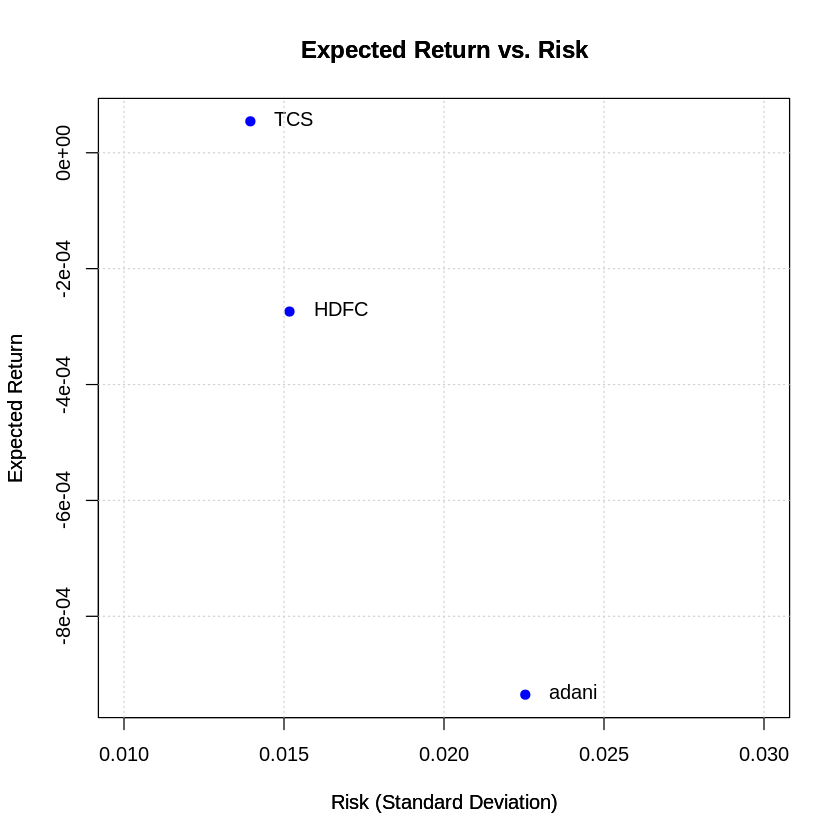

In [4]:
# Data
expected_returns <- c(-0.0009352659, -0.0002740099,5.427001e-05)
risks <- c(0.02254077, 0.01517225,0.01394881)
labels <- c("adani", "HDFC","TCS")

# Create a scatter plot
plot(x = risks, y = expected_returns,
     xlab = "Risk (Standard Deviation)", ylab = "Expected Return",
     main = "Expected Return vs. Risk",
     xlim = range(0.01,0.03), ylim = range(expected_returns),
     pch = 19,col="blue")

# Add annotations for each point
text(x = risks, y = expected_returns, labels = labels, pos = 4, offset = 1)

# Add gridlines for better visualization
grid()

# Add title and axis labels
title(main = "Expected Return vs. Risk", xlab = "Risk (Standard Deviation)", ylab = "Expected Return")

In [ ]:
library(tidyverse)
list.files(path = "../input")
install.packages('quantmod')
library(quantmod)

df_all <- read.csv("all_stocks_5yr.csv")
df_nifty <- read.csv("NIftyy50.csv")
df_all$close*10000000

names(df_all)
names(df_all) <- c("Date"  ,"Open"   ,  "High"   ,  "Low"   ,   "Close"  ,  "Volume", "Name")
names(df_all)

drops <- c("VWAP","Deliverable.Volume")
df_nifty <- df_nifty[ , !(names(df_nifty) %in% drops)]


df_nifty$Date <- dmy(df_nifty$Date)
df_nifty

names(df_nifty)

df_all$Date <- as.Date(df_all$Date)
df_nifty$Date <- as.Date(df_nifty$Date)

df_all_comp <- df_all %>% filter(Name == "JPM" | Name == "NVDA" | Name == "IBM")

df_nifty_comp <- df_nifty %>% filter(Name == "BAJAJFINSV" | Name == "HDFCBANK" | Name == "HINDUNILVR")


df_final <- full_join(df_all_comp,df_nifty_comp)

companies <- c('JPM', 'NVDA', 'IBM','BAJAJFINSV','HDFCBANK','HINDUNILVR')

ggplot(df_final[df_final$Name %in% companies, ], aes(x=Date, y=Close, color=Name)) + geom_line() +
  labs(title='Closing Stock Price of Multiple Companies Over Time',
       x='Date',
       y='Closing Stock Price') +
  scale_color_manual(values=c('JPM'='blue', 'NVDA'='red', 'IBM'='green', 'BAJAJFINSV'='black', 'HDFCBANK'='orange', 'HINDUNILVR'='pink')) +
  theme_minimal()

In [ ]:

companies <- c('HDFC', 'TCS', 'RELIANCE')
ggplot(df_nifty[df_nifty$Name %in% companies, ], aes(x=Date, y=Close, color=Name)) + geom_line() +
  labs(title='Closing Stock Price of Multiple Companies Over Time',
       x='Date',
       y='Closing Stock Price') +
  scale_color_manual(values=c('HDFC'='blue', 'TCS'='red', 'RELIANCE'='green')) +
  theme_minimal()

In [ ]:
df_all_amzn <- head(df_all %>% filter(Name == "AMZN" ), 1259)
df_nifty_adani <- head(df_nifty %>% filter(Name == "ADANIPORTS"), 1259)

df_all_amzn_close <- df_all_amzn$Close
df_nifty_adani_close <- df_nifty_adani$Close


# Compute the correlation coefficients
correlation1 <- cor(df_all_amzn_close, df_nifty_adani_close)

correlation1

[1] 0.7027548

In [ ]:
df_all_BAC <- head(df_all %>% filter(Name == "BAC" ),1259)
df_nifty_HDFCB <- head(df_nifty %>% filter(Name == "HDFCBANK"),1259)

df_all_BAC_close <- df_all_BAC$Close
df_nifty_HDFCB_close <- df_nifty_HDFCB$Close


In [ ]:
correlation1 <- cor(df_all_BAC_close, df_nifty_HDFCB_close)

correlation1

[1] 0.8414581

In [ ]:
!jupyter nbconvert --to html A1_Q1.ipynb